In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [9]:
df = pd.read_csv('/Users/tinatina/Documents/Boot Camp/Repo/project1/Project1/NPD_Data_2018_2019_V3.csv', index_col=0)

In [35]:
df1 = df[df['Category']=='DAYPACK']\
    .reset_index()\
    .copy()
df1 = df1\
    .drop(columns='TY AUR')\
    .assign(**{'Month': pd.to_datetime(df1['Month']),
              'Units': df1['Units'].str.replace('(','-').str.replace(')','').str.replace(',','').astype(int).fillna(0)})
df1

,Month,Retailer,StoreType,State,Region,Category,Units
0,2018-04-01,AAFES,B&M,KO,OTHER,DAYPACK,0
1,2018-04-01,ACADEMY SPORTS,B&M,AL,SOUTHEAST,DAYPACK,14
2,2018-04-01,ACADEMY SPORTS,B&M,AR,SOUTH CENTRAL,DAYPACK,4
3,2018-04-01,ACADEMY SPORTS,B&M,FL,SOUTHEAST,DAYPACK,2
4,2018-04-01,ACADEMY SPORTS,B&M,GA,OTHER,DAYPACK,0
...,...,...,...,...,...,...,...
19215,2021-04-01,VON MAUR,B&M,OK,SOUTH CENTRAL,DAYPACK,0
19216,2021-04-01,VON MAUR,B&M,WI,NORTH CENTRAL,DAYPACK,0
19217,2021-04-01,VON MAUR,ECOMMERCE,IA,OTHER,DAYPACK,0
19218,2021-04-01,ZAPPOS.COM,ECOMMERCE,OTHER,OTHER,DAYPACK,256


# Units VS Time for different StoreType

Text(0.5, 1.0, 'Daypack Units for different StoreType From 2018-01 to 2021-05')

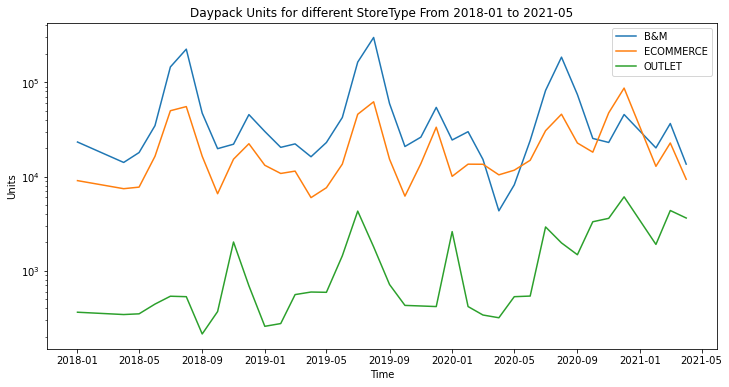

In [64]:
df2 = df1.groupby(['StoreType','Month']).agg({'Units':'sum'}).reset_index()
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
for storetype in df2['StoreType'].unique().tolist():
    # storetype = 'ECOMMERCE'
    df3 = df2[df2['StoreType']==storetype].copy().reset_index()
    ax.plot(df3['Month'], df3['Units'], label=storetype)
ax.legend()
ax.set_yscale('log')
ax.set_xlabel('Time')
ax.set_ylabel('Units')
ax.set_title('Daypack Units for different StoreType From 2018-01 to 2021-05')

In [ ]:
From this plot,we can find that

In [81]:
df1['Year'] = df1['Month'].astype(str).str[:4]
df1.head()
df1['Month1'] = df1['Month'].astype(str).str[5:7]
df1['Month2'] = df1['Month'].apply(lambda x: x.strftime('%b'))
df1.head()

,Month,Retailer,StoreType,State,Region,Category,Units,Year,Month1,Month2
0,2018-04-01,AAFES,B&M,KO,OTHER,DAYPACK,0,2018,04,Apr
1,2018-04-01,ACADEMY SPORTS,B&M,AL,SOUTHEAST,DAYPACK,14,2018,04,Apr
2,2018-04-01,ACADEMY SPORTS,B&M,AR,SOUTH CENTRAL,DAYPACK,4,2018,04,Apr
3,2018-04-01,ACADEMY SPORTS,B&M,FL,SOUTHEAST,DAYPACK,2,2018,04,Apr
4,2018-04-01,ACADEMY SPORTS,B&M,GA,OTHER,DAYPACK,0,2018,04,Apr


In [96]:
df4_2019 = df1.groupby(['Year','Month1','Month2'])\
                .agg({'Units': 'sum'})\
                .reset_index()
df4_2019['Month1'] = df4_2019['Month1'].astype(int)
df4_2019 = df4_2019.sort_values(['Year', 'Month1']).reset_index(drop=True)
df4_2019
labels = df4_2019[df4_2019['Year']=='2019']['Month2'].tolist()
df_19 = df4_2019[df4_2019['Year']=='2019']['Units'].tolist()
df_20 = df4_2019[df4_2019['Year']=='2020']['Units'].tolist()

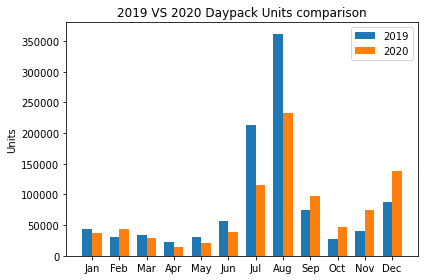

In [97]:


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df_19, width, label='2019')
rects2 = ax.bar(x + width/2, df_20, width, label='2020')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Units')
ax.set_title('2019 VS 2020 Daypack Units comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()